In [1]:
import requests
import zipfile
import io

# URL of the dataset
url = 'https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip'
# Download the dataset
response = requests.get(url)
if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        z.extractall()
        print("Dataset downloaded and extracted successfully.")
else:
    print("Failed to download the dataset.")

Dataset downloaded and extracted successfully.


In [2]:
import subprocess

def run_command(command):
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    return result.stdout

# Gather system information
report = "### System Configuration Report\n\n"
report += "**CPU Information:**\n" + run_command("lscpu") + "\n"
report += "**GPU Information:**\n" + run_command("nvidia-smi") + "\n"
report += "**Memory Information:**\n" + run_command("free -h") + "\n"
report += "**Disk Space:**\n" + run_command("df -h") + "\n"
report += "**Python Version:**\n" + run_command("python --version") + "\n"
# report += "**Installed Packages:**\n" + run_command("pip list") + "\n"

print(report)
!pip list > requirements.txt

### System Configuration Report

**CPU Information:**
Architecture:                         x86_64
CPU op-mode(s):                       32-bit, 64-bit
Address sizes:                        46 bits physical, 48 bits virtual
Byte Order:                           Little Endian
CPU(s):                               2
On-line CPU(s) list:                  0,1
Vendor ID:                            GenuineIntel
Model name:                           Intel(R) Xeon(R) CPU @ 2.20GHz
CPU family:                           6
Model:                                79
Thread(s) per core:                   2
Core(s) per socket:                   1
Socket(s):                            1
Stepping:                             0
BogoMIPS:                             4399.99
Flags:                                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

# Display the first few rows
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


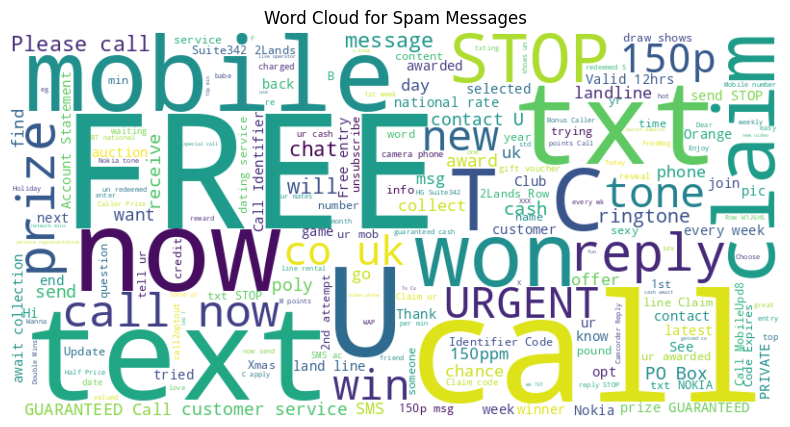

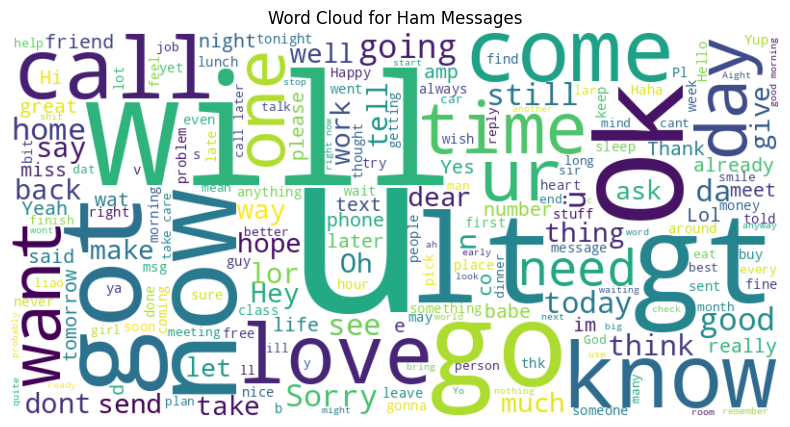

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the uploaded dataset
file_path = 'SMSSpamCollection'

# Read the file and separate messages based on type (ham or spam)
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Split data into spam and ham categories
spam_messages = []
ham_messages = []

for line in lines:
    label, message = line.strip().split('\t', 1)
    if label == 'spam':
        spam_messages.append(message)
    else:
        ham_messages.append(message)

# Generate word clouds for each category
spam_text = ' '.join(spam_messages)
ham_text = ' '.join(ham_messages)

# Word cloud for spam messages
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

# Word cloud for ham messages
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()


In [5]:
from transformers import pipeline

# Initialize the sentiment analysis pipeline with a specific model
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Function to get adjusted sentiment scores
def get_sentiment_score_adjusted(message):
    result = sentiment_analyzer(message)[0]
    score = result['score']
    if result['label'] == 'NEGATIVE':
        return -score  # Make score negative for negative sentiment
    return score  # Keep score positive for positive sentiment

# Apply the function to the dataframe
df['sentiment_score'] = df['message'].apply(get_sentiment_score_adjusted)

# Display results
print(df[['label', 'message', 'sentiment_score']].head())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

  label                                            message  sentiment_score
0   ham  Go until jurong point, crazy.. Available only ...        -0.991627
1   ham                      Ok lar... Joking wif u oni...        -0.991195
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        -0.982790
3   ham  U dun say so early hor... U c already then say...        -0.995092
4   ham  Nah I don't think he goes to usf, he lives aro...        -0.996230


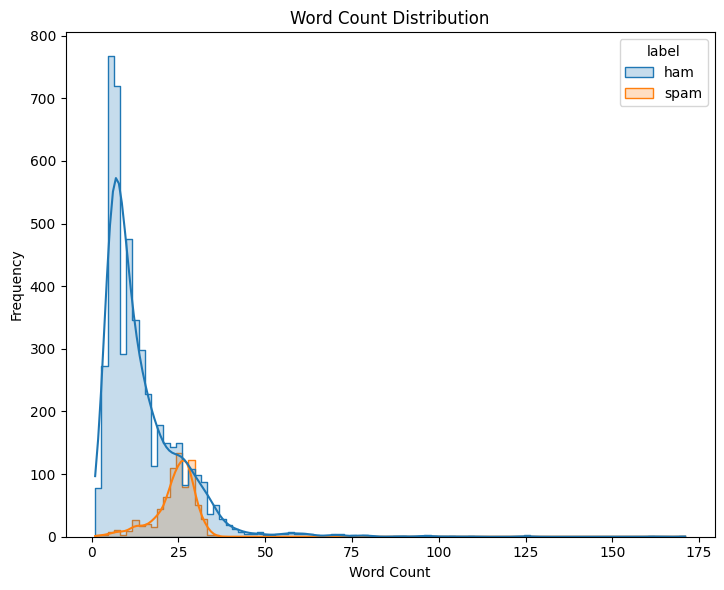

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df['word_count'] = df['message'].apply(lambda x: len(x.split()))
# Plot distributions of message lengths and word counts for spam and ham messages
plt.figure(figsize=(14, 6))
# Word Count Distribution
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='word_count', hue='label', kde=True, element='step')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [7]:
# Provide the CSV file for download
from google.colab import files
# Save the processed dataframe to a CSV file
output_path = "processed_sms_spam_collection.csv"
df.to_csv(output_path, index=False)

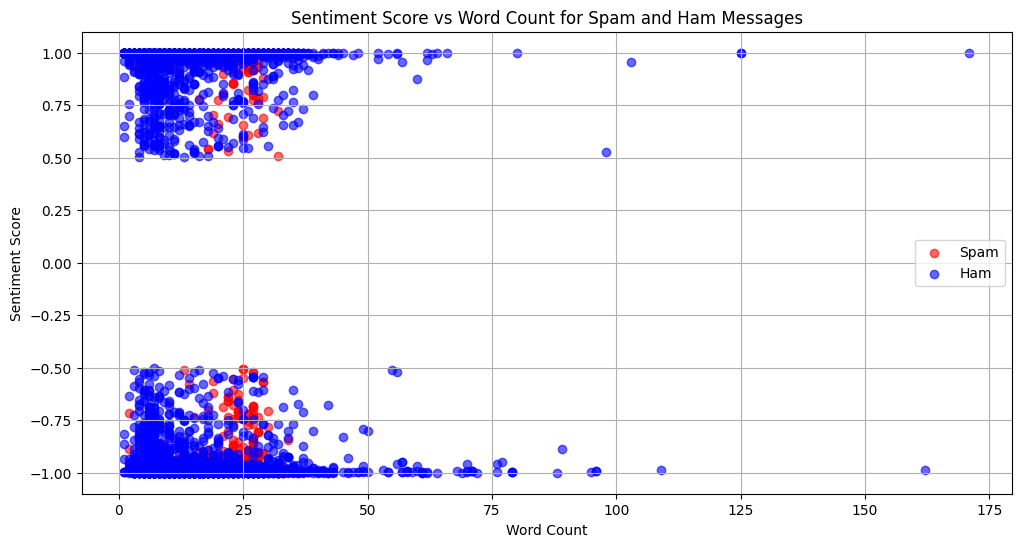

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded CSV file
file_path = 'processed_sms_spam_collection.csv'
df = pd.read_csv(file_path)

# Plot sentiment score vs word count for spam and ham messages
plt.figure(figsize=(12, 6))

# Scatter plot for spam messages
spam = df[df['label'] == 'spam']
plt.scatter(spam['word_count'], spam['sentiment_score'], color='red', label='Spam', alpha=0.6)

# Scatter plot for ham messages
ham = df[df['label'] == 'ham']
plt.scatter(ham['word_count'], ham['sentiment_score'], color='blue', label='Ham', alpha=0.6)

# Add labels, title, and legend
plt.title('Sentiment Score vs Word Count for Spam and Ham Messages')
plt.xlabel('Word Count')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Select features and target
features = df[['word_count', 'sentiment_score']]
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(df['label'])  # spam=1, ham=0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

accuracy, classification_report_output


(0.8899521531100478,
 '              precision    recall  f1-score   support\n\n           0       0.93      0.95      0.94      1448\n           1       0.60      0.52      0.56       224\n\n    accuracy                           0.89      1672\n   macro avg       0.77      0.73      0.75      1672\nweighted avg       0.88      0.89      0.89      1672\n')

References

Sanh, V. "DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter." arXiv preprint arXiv:1910.01108 (2019).